In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('LoanStats3ab.csv',low_memory=False)
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df.isnull().sum();

In [55]:
col=[]
for nam in df.columns:
    if df[nam].isnull().sum() >40000:
        col.append(nam)

In [56]:
df.drop(col,axis=1,inplace=True)

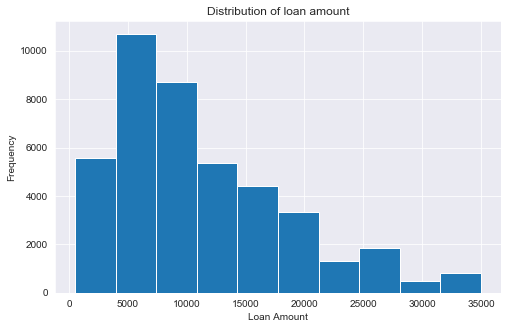

In [71]:
sns.set_style('darkgrid')
df['loan_amnt'].plot(kind='hist',figsize=(8,5));
# plt.bar(df['loan_amnt'])
# df['loan_amnt'].value_counts().plot(kind='bar')
plt.xlabel('Loan Amount');
plt.title('Distribution of loan amount');

In [75]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42506.000000,15609.000000,3651.000000,...,42535.000000,42535.000000,42535.000000,42390.0,42535.0,42506.000000,42390.0,42506.000000,41170.000000,42430.000000
mean,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,13.373043,0.152449,1.081424,35.017618,59.175568,...,103.151653,14.412356,2613.245652,0.0,1.0,0.000094,0.0,0.143039,0.045227,0.000024
std,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,6.726315,0.512406,1.527455,22.418427,47.145396,...,736.459479,162.271913,4385.066535,0.0,0.0,0.009700,0.0,29.359579,0.208737,0.004855
min,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,17.000000,0.000000,...,0.000000,0.000000,211.050000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,33.000000,85.000000,...,0.000000,0.000000,528.360000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
75%,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,51.000000,101.000000,...,0.000000,0.000000,3170.220000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,120.000000,129.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,1.000000,0.0,6053.000000,2.000000,1.000000


In [79]:
df.groupby('loan_status').loan_amnt.count()

loan_status
Charged Off                                             5670
Does not meet the credit policy. Status:Charged Off      761
Does not meet the credit policy. Status:Fully Paid      1988
Fully Paid                                             34116
Name: loan_amnt, dtype: int64

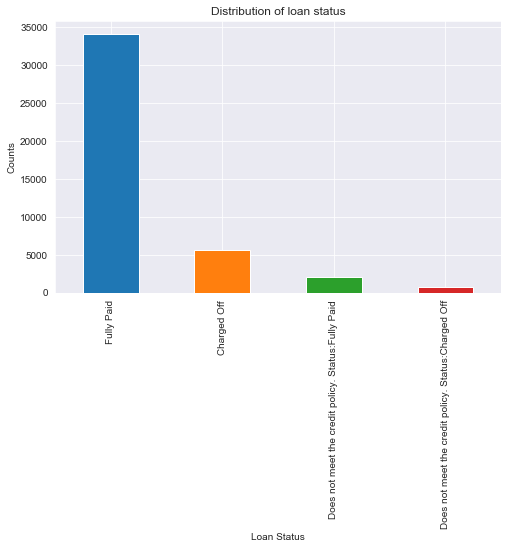

In [83]:
df['loan_status'].value_counts().plot(kind='bar',figsize=(8,5));
plt.xlabel('Loan Status');
plt.title('Distribution of loan status');
plt.ylabel('Counts');